<a href="https://colab.research.google.com/github/bsse1009/Aes/blob/master/tensorflow_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_labels = []
train_samples = []
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [ ]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))
print(scaled_train_samples)
print(train_labels)

[[0.47126437]
 [0.57471264]
 [0.67816092]
 ...
 [0.70114943]
 [0.6091954 ]
 [0.74712644]]
[0 0 1 ... 1 1 1]


In [ ]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)

Epoch 1/30
189/189 - 1s - loss: 0.7127 - accuracy: 0.5063 - val_loss: 0.6949 - val_accuracy: 0.4429
Epoch 2/30
189/189 - 0s - loss: 0.6754 - accuracy: 0.7434 - val_loss: 0.6538 - val_accuracy: 0.7429
Epoch 3/30
189/189 - 0s - loss: 0.6440 - accuracy: 0.7317 - val_loss: 0.6186 - val_accuracy: 0.7476
Epoch 4/30
189/189 - 0s - loss: 0.6117 - accuracy: 0.7688 - val_loss: 0.5834 - val_accuracy: 0.7714
Epoch 5/30
189/189 - 0s - loss: 0.5784 - accuracy: 0.7921 - val_loss: 0.5499 - val_accuracy: 0.8095
Epoch 6/30
189/189 - 0s - loss: 0.5452 - accuracy: 0.8307 - val_loss: 0.5165 - val_accuracy: 0.8238
Epoch 7/30
189/189 - 0s - loss: 0.5146 - accuracy: 0.8455 - val_loss: 0.4888 - val_accuracy: 0.8524
Epoch 8/30
189/189 - 0s - loss: 0.4876 - accuracy: 0.8614 - val_loss: 0.4630 - val_accuracy: 0.8667
Epoch 9/30
189/189 - 0s - loss: 0.4618 - accuracy: 0.8810 - val_loss: 0.4379 - val_accuracy: 0.8714
Epoch 10/30
189/189 - 0s - loss: 0.4376 - accuracy: 0.8910 - val_loss: 0.4144 - val_accuracy: 0.8714

In [ ]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [ ]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
)  

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)
print(rounded_predictions)
print(test_labels)

[1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 0 0 0 0 1 1 0 1]
[1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1
 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0

In [ ]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [ ]:
 def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[188  22]
 [  9 201]]


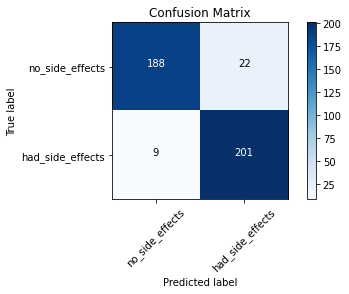

In [ ]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model.save('models/medical_trial_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')